**Введение:** в этой работе мы применим преобразование Фурье для фильтрации различного рода сигналов. От сгенерированных самостоятельно, до настоящих звуковых записей.

Для этого напишем небольшой код на Python3


In [230]:
import random
import wave
import numpy as np
import matplotlib.pyplot as plt

In [231]:
# Creating signal wave with some random noises.
def create_signal(a, b, c, d, t1, t2, T):
    t_num = 1000
    g = lambda t: a if (t < t2 and t > t1) else 0
    t = np.linspace(-T/2, T/2, t_num)
    gt = [g(i) for i in t]
    u = lambda t: g(t) + b * (random.uniform(0, 1) - 0.5) + c * np.sin(d * t)
    ut = [u(i) for i in t]
    return ut, t

def draw_signal(t, signal_t, label, filename):
    fig, ax = plt.subplots()
    plt.ylabel("Signal")
    plt.xlabel('Time')
    plt.grid(True)
    plt.title(label)
    ax.plot(t, signal_t)

    plt.savefig("/home/den/ITMO/fourier_series_labs/Lab3/images/result/"+filename+".jpeg")





def draw_fft(fourier_image, label, filename):
    fig, ax = plt.subplots()
    ax.plot(np.abs(fourier_image))
    plt.xlabel('Frequencies (Hz)')
    plt.ylabel('Magnitude of frequencies')
    plt.grid(True)
    plt.title(label)
    plt.savefig("/home/den/ITMO/fourier_series_labs/Lab3/images/result/"+filename+"_fourier.jpeg")


Для начала нарисуем график исходной ситуации для случая $c = 0$, $a = 2$, $b = 0.32$ и попытаемся убрать высокие частоты с помощью преборазования фурье

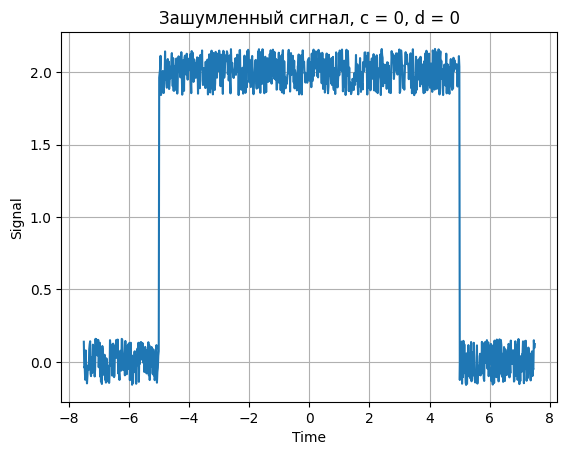

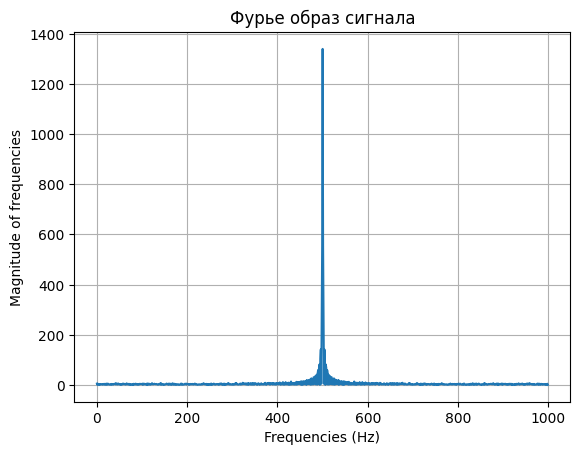

In [232]:
# Plot original singal with noise and its fourier image.
signal, t = create_signal(2, 0.32, 0, 0, -5, 5, 15)
signal_fourier_im = np.fft.fftshift(np.fft.fft(signal))
u_fourier_image = (signal_fourier_im)
draw_signal(t, signal, 'Зашумленный сигнал, c = 0, d = 0', 'original_s1')
draw_fft(u_fourier_image, "Фурье образ сигнала", 'original_s1')
None

Сразу обратим внимание на то, что параметр $b$ отвечает за степень зашумленности сигнала - покажем это на графике

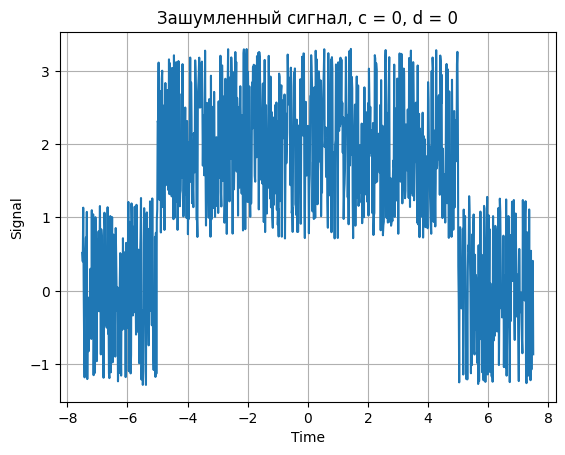

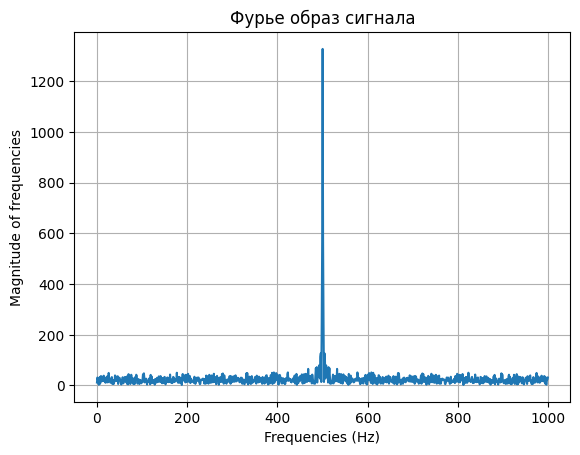

In [233]:
# Plot  some singal with more noise and its fourier image. (experiment aim)
signal_test, t_test = create_signal(2, 2.6, 0, 0, -5, 5, 15)
signal_fourier_im_test = np.fft.fftshift(np.fft.fft(signal_test))
u_fourier_image_test = (signal_fourier_im_test)
draw_signal(t_test, signal_test, 'Зашумленный сигнал, c = 0, d = 0', 'original_s2')
draw_fft(u_fourier_image_test, "Фурье образ сигнала", 'original_s2')
None

Напишем функцию для фильтрации верхних частот

In [234]:
# Filter that removes only some high frequencies from signal
def high_freq_filtration(fourier_image, treshold):
    n = fourier_image.shape[0]
    frequencies_range = np.linspace(-n/2, n/2, 1000)
    counter = 0
    for k in frequencies_range:
        if (abs(k) >= treshold):
            fourier_image[counter] = 0
        counter += 1
    return fourier_image

И применим к нашему исходному сигналу

/home/den/.local/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


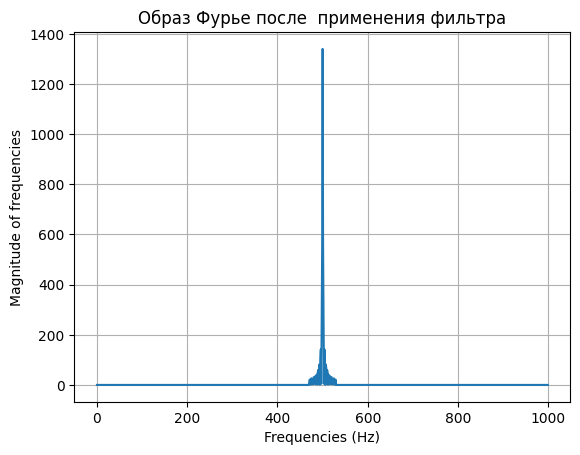

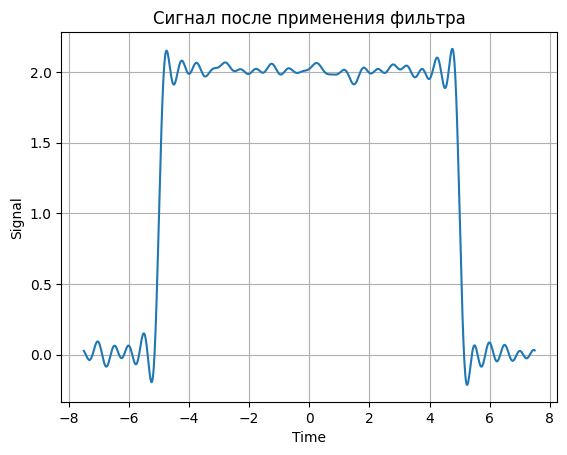

In [235]:
# Applying filter, remove all too high freqs
high_freqs_removed_f = high_freq_filtration(u_fourier_image, 30)
high_filtered_s = np.fft.ifft(np.fft.ifftshift(high_freqs_removed_f))
draw_fft(high_freqs_removed_f, "Образ Фурье после  применения фильтра", 'high_freq1')
draw_signal(t, high_filtered_s, 'Сигнал после применения фильтра', 'high_freq1')
None

Также не забудем про тестовый, более зашумленный сигнал, его попробуем также отфильтровать:

/home/den/.local/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


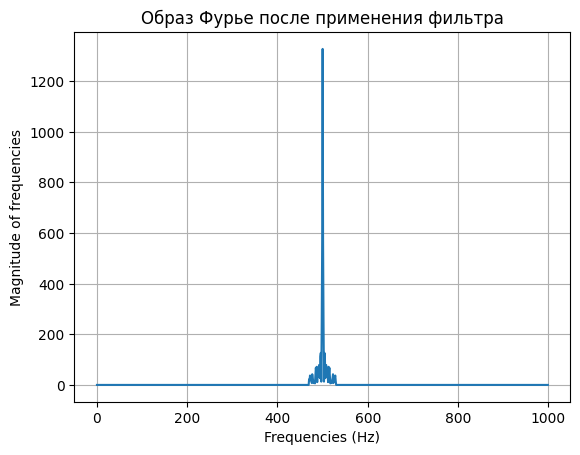

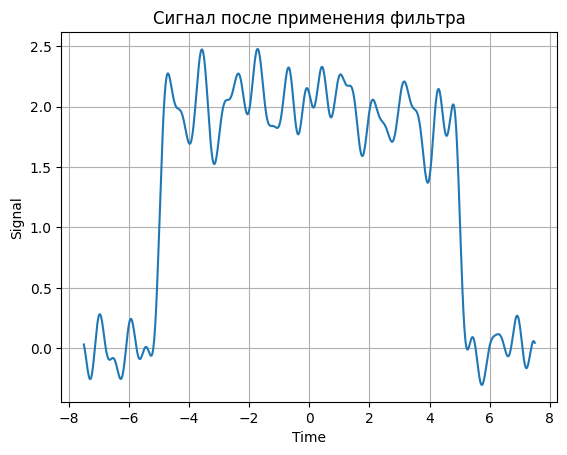

In [236]:
high_freqs_removed_f_test = high_freq_filtration(u_fourier_image_test, 30)
high_filtered_s_test = np.fft.ifft(np.fft.ifftshift(high_freqs_removed_f_test))
draw_fft(high_freqs_removed_f_test, "Образ Фурье после применения фильтра", 'high_freq2')
draw_signal(t, high_filtered_s_test, 'Сигнал после применения фильтра', 'high_freq2')
None

Получилось заметно хуже, что в целом, было достотаточно ожидаемо - чем больше шума, тем сложнее его убрать)

Теперь приступим ко второму подзаданию, положим все параметрами ненулевыми и отфильтруем получившийся сигнал.

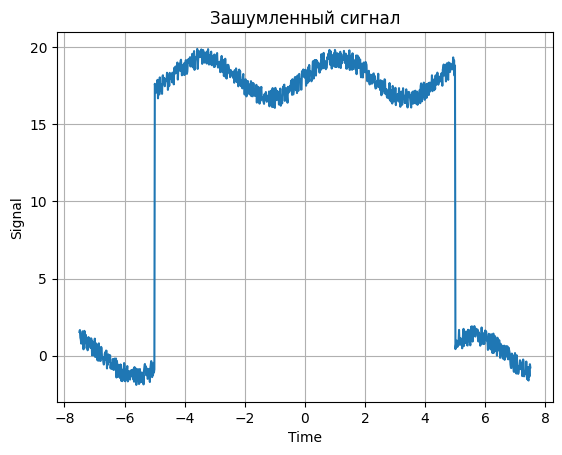

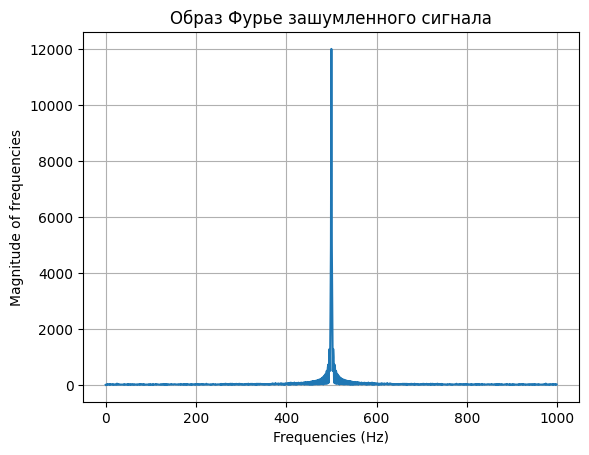

In [237]:
# Create 2nd noised signal with non-zero params
signal, t = create_signal(18, 1.32, 1.3, 1.4, -5, 5, 15)
signal_fourier_im = np.fft.fftshift(np.fft.fft(signal))
u_fourier_image = (signal_fourier_im)
draw_signal(t, signal, 'Зашумленный сигнал', 'orginal_s3')
draw_fft(u_fourier_image, 'Образ Фурье зашумленного сигнала', 'original_s3')

In [238]:
# Filter that will remove both high and low freqs
def spec_freq_filtration(fourier_image, treshold1, treshold2):
    n = fourier_image.shape[0]
    frequencies_range = np.linspace(-n/2, n/2, 1000)
    counter = 0
    for k in frequencies_range:
        if (abs(k) <= treshold1) or (abs(k) >= treshold2):
            fourier_image[counter] = 0
        counter += 1
    return fourier_image

/home/den/.local/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


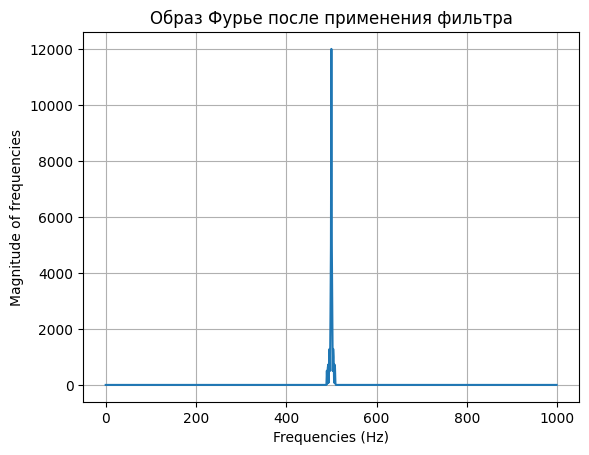

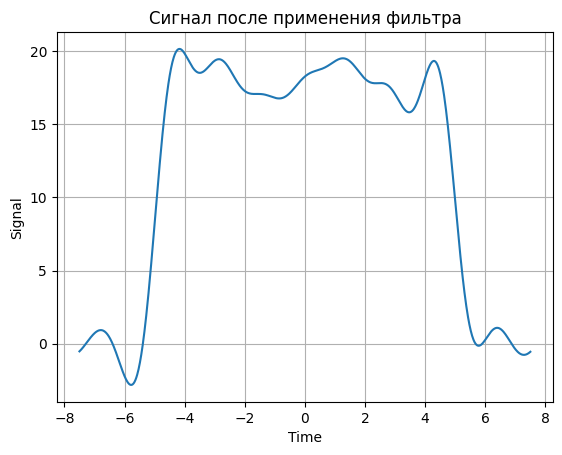

In [239]:
spec_freqs_removed_f = spec_freq_filtration(u_fourier_image, 0.4,  9.7)
spec_filtered_s = np.fft.ifft(np.fft.ifftshift(spec_freqs_removed_f))
draw_fft(spec_freqs_removed_f, 'Образ Фурье после применения фильтра', 'spec_freq')
draw_signal(t, spec_filtered_s, 'Сигнал после применения фильтра', 'spec_freq')
None

Что будет, если мы уберем зашумленность, положив параметр b равным нолю

/home/den/.local/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


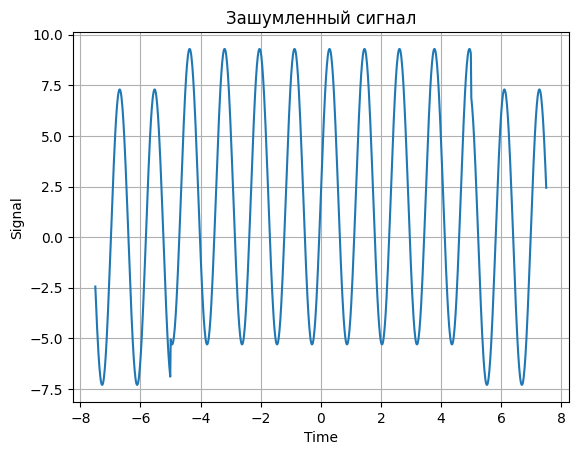

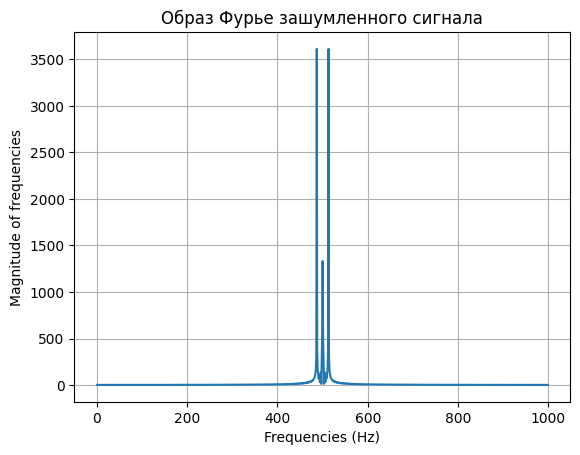

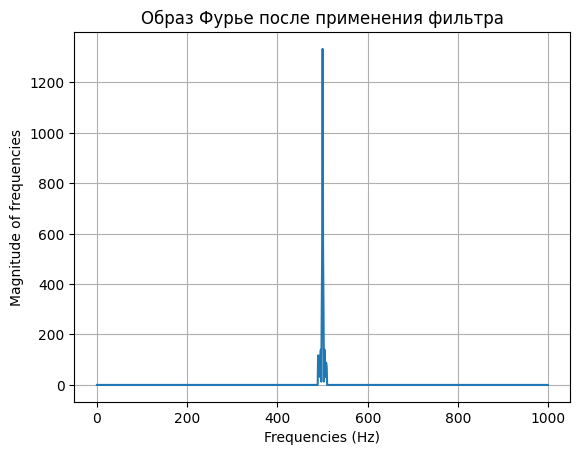

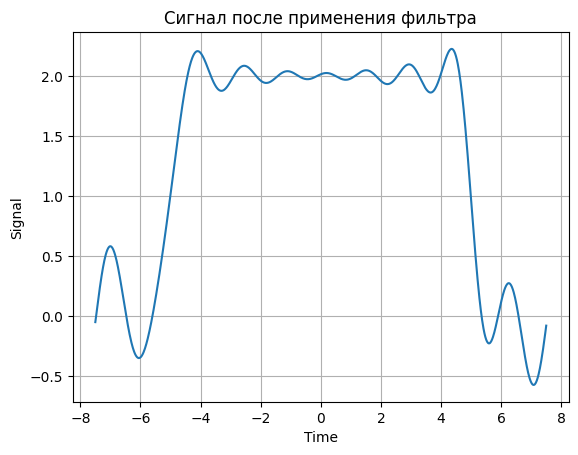

In [240]:
# Creating third signal without random noise.
signal, t = create_signal(2, 0, 7.3, 5.4, -5, 5, 15)
signal_fourier_im = np.fft.fftshift(np.fft.fft(signal))
u_fourier_image = (signal_fourier_im)
draw_signal(t, signal, 'Зашумленный сигнал', 'orginal4')
draw_fft(u_fourier_image, 'Образ Фурье зашумленного сигнала', 'original4') 
spec_freqs_removed_f = spec_freq_filtration(u_fourier_image, 0.1, 9.9)
spec_filtered_s = np.fft.ifft(np.fft.ifftshift(spec_freqs_removed_f))
draw_fft(spec_freqs_removed_f, 'Образ Фурье после применения фильтра', 'spec_freq2')
draw_signal(t,spec_filtered_s, 'Сигнал после применения фильтра', 'spec_freq2')
None

Заметно, что фильтрация работает достаточно неплохо. Главное в этой фильтрации - не срезать слишком много низких частот, несующих основную информацию о форме исходного сигнала.

Приступим к последней подзадче - к фильрации исключительно низких частот.

In [241]:
# Filter that will remove only some low freqs
def low_freq_filtration(fourier_image, treshold1):
    n = fourier_image.shape[0]
    frequencies_range = np.linspace(-n/2, n/2, 1000)
    counter = 0
    for k in frequencies_range:
        if (abs(k) <= treshold1):
            fourier_image[counter] = 0
        counter += 1
    return fourier_image

/home/den/.local/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


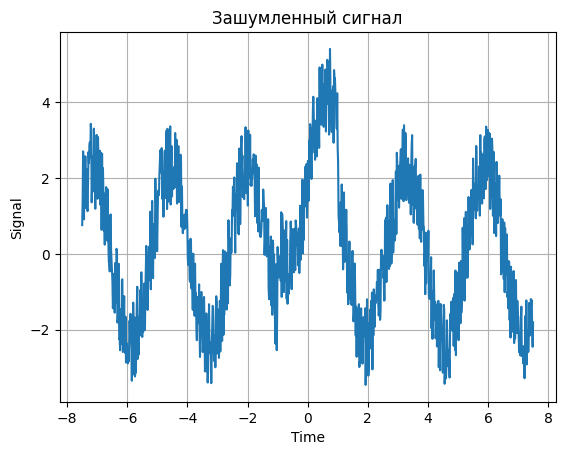

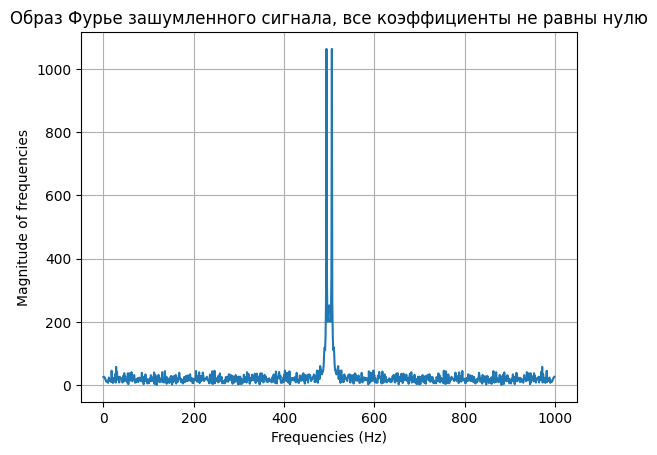

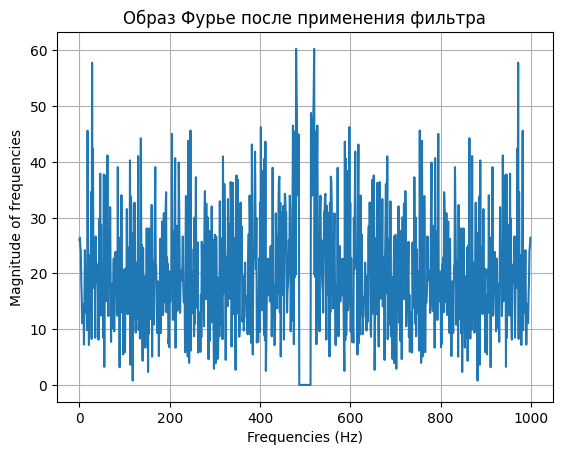

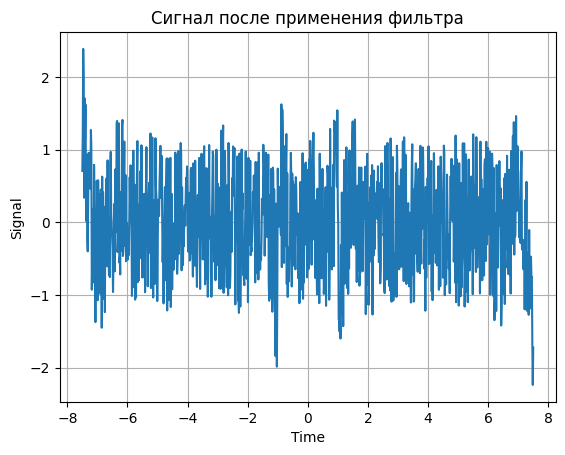

In [242]:
# Aplying the last filter on our noiseed signal
signal, t = create_signal(2, 2.32, 2.3, 2.4, -1, 1, 15)
signal_fourier_im = np.fft.fftshift(np.fft.fft(signal))
u_fourier_image = (signal_fourier_im)
draw_signal(t, signal, 'Зашумленный сигнал', 'original_s5')
draw_fft(u_fourier_image, 'Образ Фурье зашумленного сигнала, все коэффициенты не равны нулю', 'original_s5')
low_freqs_removed_f = low_freq_filtration(u_fourier_image, 13)
low_filtered_s = np.fft.ifft(np.fft.ifftshift(low_freqs_removed_f))
draw_fft(low_freqs_removed_f, 'Образ Фурье после применения фильтра', 'low_freq')
draw_signal(t,low_filtered_s, 'Сигнал после применения фильтра', 'low_freq')
None

Видно, что никакой фильтрации  не получилось. Но я, честно говоря, не сильно удивлен, т.к я отрезал самую основную информацию об исходной форме сигнала, и по сути получил в результате только шум. Вроде как, все логично, но видимо не очень полезно с точки зрения практического примения (в данной конкретной ситуации)....

**Задание-2** Фильтрация звука.

В этой части работы мы применим то же самое Фурье-преобразование, чтобы убрать шумы с аудио дорожки.

In [243]:
# read .wav and extract the sound wave
def create_soundwave(path):
    raw = wave.open(path)
    signal = raw.readframes(-1) 
    signal = np.frombuffer(signal, dtype ="int16") 
    
    f_rate = raw.getframerate() 
    time = np.linspace( 0, len(signal) / f_rate, num = len(signal)) 
    return f_rate, signal, time # frequency, soundwave & it's timeline

In [244]:
PATH = "/home/den/ITMO/fourier_series_labs/Lab3/images/MUHA.wav"
f_rate, signal, t = create_soundwave(PATH)

In [249]:
def draw_signal(t, signal_t, label, filename):
    fig, ax = plt.subplots()
    plt.ylabel("signal")
    plt.xlabel('Time')
    plt.title(label)
    ax.plot(t, signal_t)
    plt.savefig("/home/den/ITMO/fourier_series_labs/Lab3/images/result/"+filename+".jpeg")


def draw_fft(fourier_image, label, filename):
    fig, ax = plt.subplots()
    ax.plot(np.abs(fourier_image))
    plt.xlabel('Frequencies (Hz)')
    plt.ylabel('Magnitude of frequencies')
    plt.title(label)
    plt.savefig("/home/den/ITMO/fourier_series_labs/Lab3/images/result/"+filename+"_fourier.jpeg")

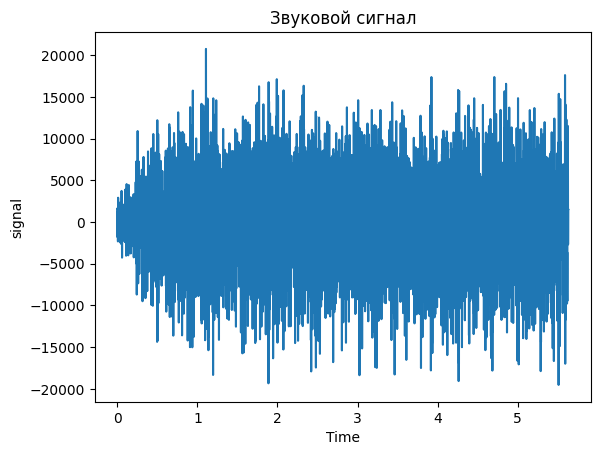

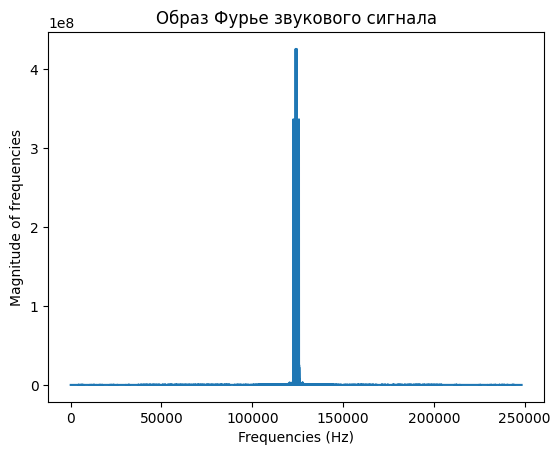

In [250]:
# caclulate Fourier image of the signal and plot it
signal_fourier_im = np.fft.fftshift(np.fft.fft(signal))
draw_signal(t, signal, 'Звуковой сигнал', "sound_wave")
draw_fft(signal_fourier_im, 'Образ Фурье звукового сигнала', "soundwave")

Если судить по распределению частот, лучше всего будет использовать именно фильтр, который срежет лишь толоько верхние частоты.

Поехали!

In [247]:
# Filtering high frequencies for avoiding noises
def high_freq_filtration(fourier_image, treshold1):
    n = fourier_image.shape[0]
    frequencies_range = np.linspace(-n/2, n/2, n)
    counter = 0
    for k in frequencies_range:
        if (abs(k) >= treshold1):
            fourier_image[counter] = 0
        counter += 1
    return fourier_image

/home/den/.local/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


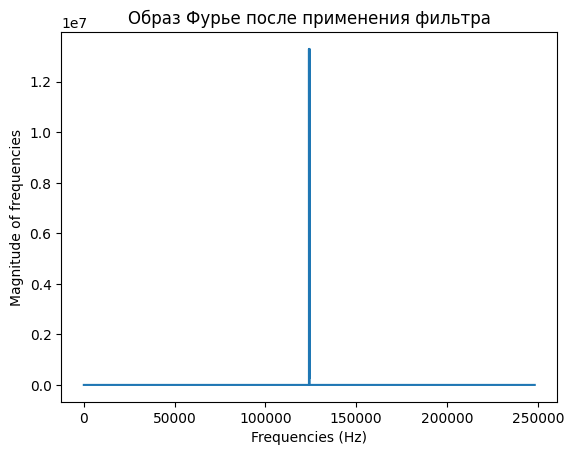

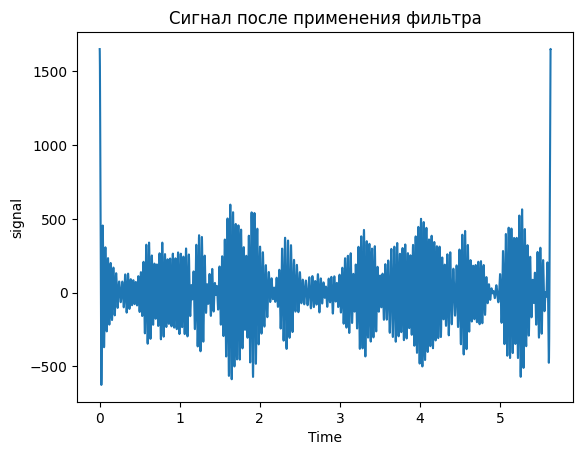

In [251]:
# FIltering process itself 
high_freqs_removed_f = high_freq_filtration(signal_fourier_im, 175) #frequencies of the filtered sound wave
high_filtered_s = np.fft.ifft(np.fft.ifftshift(high_freqs_removed_f)) #filtered soundwave calculation
draw_fft(high_freqs_removed_f, "Образ Фурье после применения фильтра", "soundwave_filtration1")
draw_signal(t, high_filtered_s, 'Сигнал после применения фильтра', "soundwave_filtration1")
None

**Вывод**

Заметно, что шумы в результате наложения фильтра ушли и остался только чистый, нормальный звук, что не может не радовать)